# Capstone Project
## Image classifier for the SVHN dataset
### Instructions

In this notebook, a neural network have been implemented that classifies real-world images digits.
![SVHN overview image](data/svhn_examples.jpg)

For this, I have used the [SVHN dataset](http://ufldl.stanford.edu/housenumbers/). This is an  image dataset of over 600,000 digit images in all, and is a harder dataset than MNIST as the numbers appear in the context of natural scene images. SVHN is obtained from house numbers in Google Street View images. 

* Y. Netzer, T. Wang, A. Coates, A. Bissacco, B. Wu and A. Y. Ng. "Reading Digits in Natural Images with Unsupervised Feature Learning". NIPS Workshop on Deep Learning and Unsupervised Feature Learning, 2011.


In [ ]:
import tensorflow as tf
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Run this cell to load the dataset

train = loadmat('data/train_32x32.mat')
test = loadmat('data/test_32x32.mat')



Both `train` and `test` are dictionaries with keys `X` and `y` for the input images and labels respectively.

## 1. Inspect and preprocess the dataset


In [ ]:
train_x=train['X']/255
train_x=np.moveaxis(train_x,-1,0)
train_y=train['y']
train_y[train_y==10]=0
train_y=tf.keras.utils.to_categorical(train_y)
test_x=test['X']/255
test_x=np.moveaxis(test_x,-1,0)
test_y=test['y']
test_y[test_y==10]=0
test_y=tf.keras.utils.to_categorical(test_y)


In [ ]:
test_y.shape

(26032, 10)

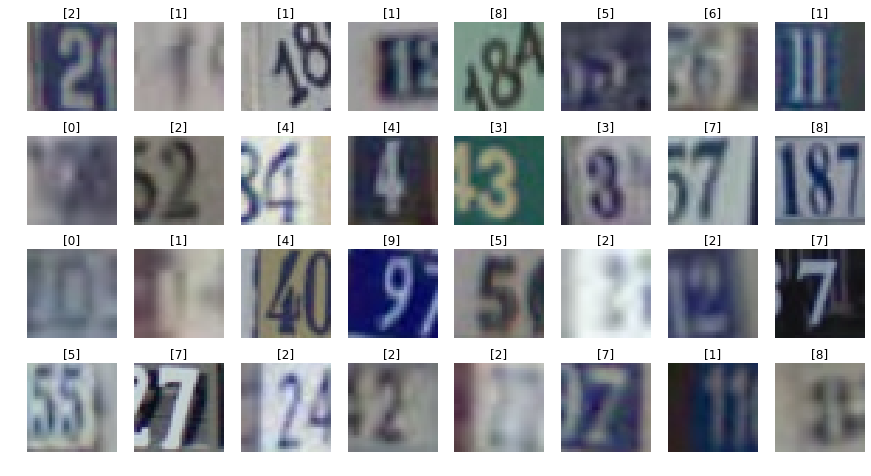

In [ ]:
plt.figure(figsize=(15,8))
inx = np.random.choice(train_x.shape[0], 32, replace=False)
for n, i in enumerate(inx):
    ax = plt.subplot(4, 8, n+1)
    plt.imshow(train_x[i])
    plt.title(train['y'][i])
    plt.axis('off')

In [ ]:
train_xG=np.mean(train_x,3)
test_xG=np.mean(test_x,3)


In [ ]:
test_y.shape

(26032, 10)

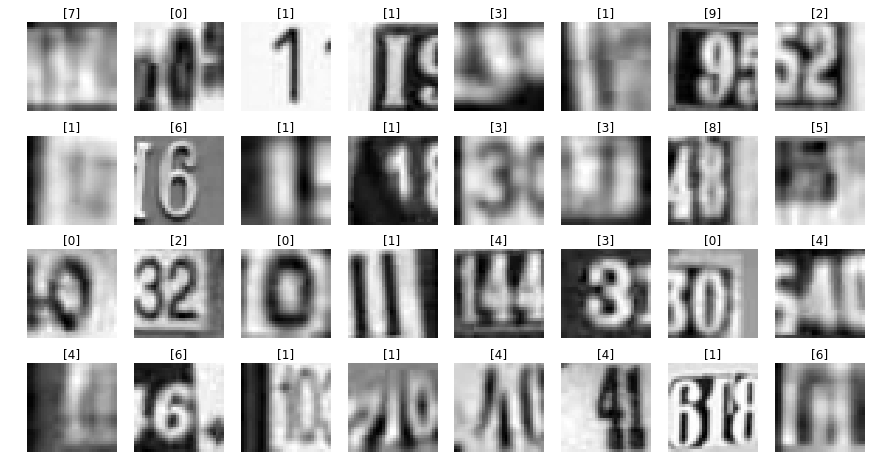

In [ ]:
plt.figure(figsize=(15,8))
inx = np.random.choice(train_xG.shape[0], 32, replace=False)
for n, i in enumerate(inx):
    ax = plt.subplot(4, 8, n+1)
    plt.imshow(train_xG[i],cmap='gray')
    plt.title(train['y'][i])
    plt.axis('off')

In [ ]:
train_images = train_xG[..., np.newaxis]
test_images = test_xG[..., np.newaxis]


## 2. MLP neural network classifier


In [ ]:
MLP_model= tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 1)),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [ ]:
MLP_model.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy'])
MLP_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 296,586
Trainable params: 296,586
Non-trainable params: 0
_________________________________________________________________


In [ ]:
ES=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=4)
CP=tf.keras.callbacks.ModelCheckpoint('/CP/weights.hdf5',save_best_only=True,monitor='val_loss')
history_MLP=MLP_model.fit(x=train_images,y=train_y,batch_size=64,epochs=20,validation_split=0.15,shuffle=True,callbacks=[ES])

Train on 62268 samples, validate on 10989 samples
Epoch 1/20
62268/62268 [==============================] - 31s 498us/sample - loss: 2.0862 - accuracy: 0.2526 - val_loss: 1.6918 - val_accuracy: 0.4333
Epoch 2/20
62268/62268 [==============================] - 29s 461us/sample - loss: 1.4986 - accuracy: 0.4944 - val_loss: 1.4075 - val_accuracy: 0.5399
Epoch 3/20
62268/62268 [==============================] - 29s 462us/sample - loss: 1.3463 - accuracy: 0.5592 - val_loss: 1.3014 - val_accuracy: 0.5718
Epoch 4/20
62268/62268 [==============================] - 29s 463us/sample - loss: 1.2633 - accuracy: 0.5956 - val_loss: 1.2121 - val_accuracy: 0.6165
Epoch 5/20
62268/62268 [==============================] - 29s 466us/sample - loss: 1.1819 - accuracy: 0.6296 - val_loss: 1.1737 - val_accuracy: 0.6356
Epoch 6/20
62268/62268 [==============================] - 29s 469us/sample - loss: 1.1297 - accuracy: 0.6464 - val_loss: 1.1070 - val_accuracy: 0.6572
Epoch 7/20
62268/62268 [====================

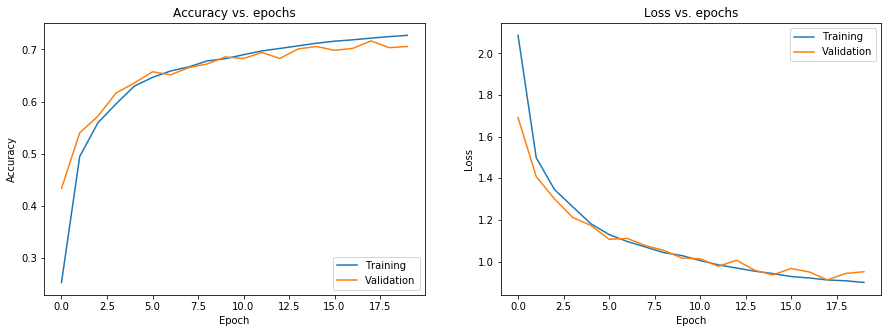

In [ ]:
#  plot accuracy vs epoch and loss vs epoch

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(history_MLP.history['accuracy'])
plt.plot(history_MLP.history['val_accuracy'])

plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')

plt.subplot(122)
plt.plot(history_MLP.history['loss'])
plt.plot(history_MLP.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

In [ ]:
loss, acc= MLP_model.evaluate(test_images,test_y,batch_size=64)


26032/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

1.062758482447708 0.682583


In [ ]:
print(loss,acc)

1.062758482447708 0.682583


## 3. CNN neural network classifier


In [ ]:
CNN_model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8,3,padding='SAME',activation='relu',input_shape=(32,32,1)),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(16,3,padding='SAME',activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(8,3,padding='SAME',activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [ ]:
CNN_model.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy'])
CNN_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 8)         80        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 16, 16, 16)        1168      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 8, 8, 16)          64        
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 8, 8, 8)           1160      
_________________________________________________________________
batch_normalization_17 (Batc (None, 8, 8, 8)          

In [ ]:
ES=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=4)
CP=tf.keras.callbacks.ModelCheckpoint('/CNN_weights.hdf5',save_best_only=True,monitor='val_loss')
history=CNN_model.fit(x=train_images,y=train_y,batch_size=64,epochs=20,validation_split=0.15,shuffle=True,callbacks=[ES])

Train on 62268 samples, validate on 10989 samples
Epoch 1/20
62268/62268 [==============================] - 208s 3ms/sample - loss: 0.8804 - accuracy: 0.7178 - val_loss: 0.5192 - val_accuracy: 0.8467
Epoch 2/20
62268/62268 [==============================] - 199s 3ms/sample - loss: 0.4774 - accuracy: 0.8552 - val_loss: 0.5338 - val_accuracy: 0.8444
Epoch 3/20
62268/62268 [==============================] - 190s 3ms/sample - loss: 0.3952 - accuracy: 0.8782 - val_loss: 0.4290 - val_accuracy: 0.8718
Epoch 4/20
62268/62268 [==============================] - 193s 3ms/sample - loss: 0.3458 - accuracy: 0.8953 - val_loss: 0.3782 - val_accuracy: 0.8888
Epoch 5/20
62268/62268 [==============================] - 190s 3ms/sample - loss: 0.3077 - accuracy: 0.9059 - val_loss: 0.4643 - val_accuracy: 0.8567
Epoch 6/20
62268/62268 [==============================] - 191s 3ms/sample - loss: 0.2762 - accuracy: 0.9156 - val_loss: 0.4883 - val_accuracy: 0.8658
Epoch 7/20
62268/62268 [==========================

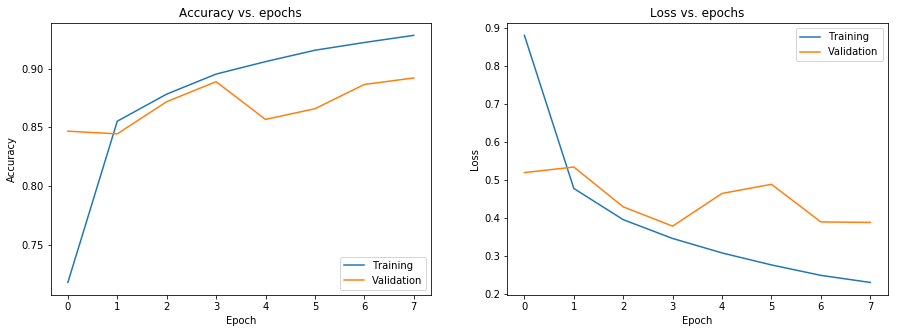

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

In [ ]:
loss, acc= CNN_model.evaluate(test_images,test_y,batch_size=64)

26032/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

## 4. Get model predictions


In [ ]:

num_test_images = test_images.shape[0]

random_inx = np.random.choice(test_images.shape[0], 5)
random_test_images = test_images[random_inx, ...]
random_test_labels = test_y[random_inx, ...]



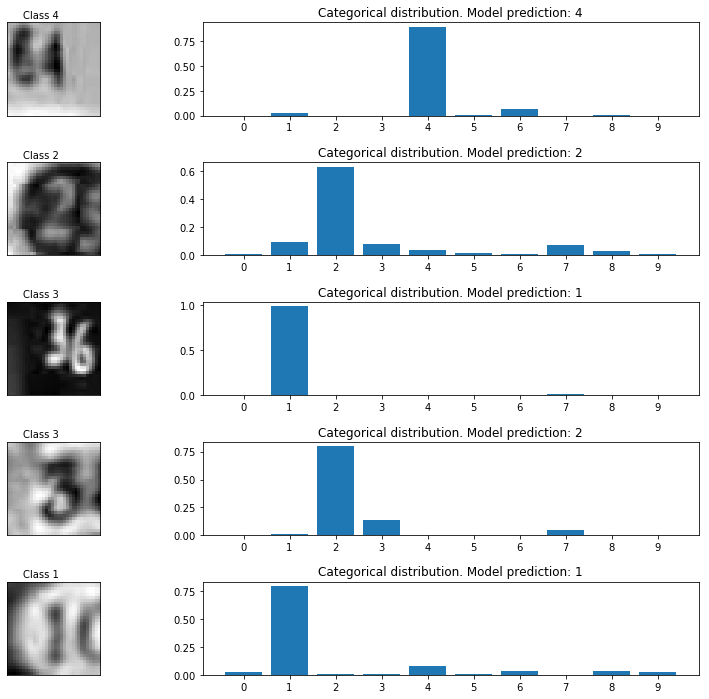

In [ ]:
#MLP_model.load_wights('/CP/weights.hdf5')
predictions = MLP_model(random_test_images)

fig, axes = plt.subplots(5, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.5, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image),cmap='gray')
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(5., -2., f'Class {np.argmax(label)}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_xticklabels(np.arange(10), rotation=0)
    pred_inx = np.argmax(prediction)
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {pred_inx}")
    
plt.show()

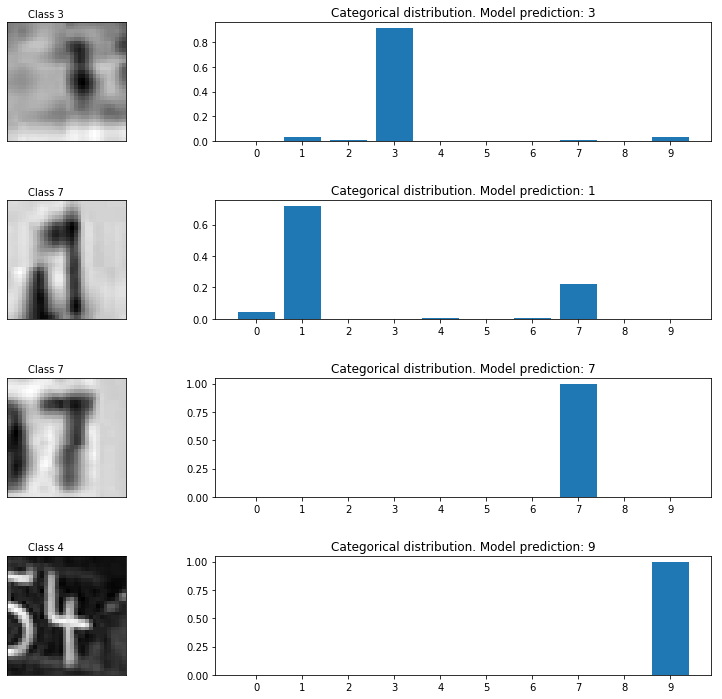

In [ ]:

#CNN_model.load_wights('/CNN_weights.hdf5')
predictions = CNN_model(random_test_images)

fig, axes = plt.subplots(5, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.5, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image),cmap='gray')
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(5., -2., f'Class {np.argmax(label)}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_xticklabels(np.arange(10), rotation=0)
    pred_inx = np.argmax(prediction)
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {pred_inx}")
    
plt.show()